In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
companies = [
    "NFLX", "TSLA", "ORCL", "CSCO", "CRM",  # Technology
    "QCOM", "TXN", "ADBE", "SNPS", "ATVI", "AMAT", "NOW", "RNG", "INTC", "HPE",  # Semiconductors & Software
    "V", "MA", "C", "JPM", "WFC", "TROW", "SCHW", "CME", "MSCI",  # Financials
    "NKE", "LULU", "TJX", "COST", "HD", "LOW", "TGT", "WMT", "BBY",  # Consumer Discretionary & Retail
    "JNJ", "PFE", "MRK", "AMGN", "ABBV", "CVS", "GSK", "AZN",  # Healthcare
    "KO", "PEP", "PG", "CLX", "CAG", "SJM", "CPB",  # Consumer Staples
]


In [3]:
data = pd.DataFrame()

In [4]:
for i in companies:
    curr = yf.download("AAPL", start='2014-10-15', end='2024-10-24')

    curr = curr.reset_index()

    curr.columns = [col[0] for col in curr.columns]

    curr.drop(columns=['Date'], inplace=True)
    
    data = pd.concat([data, curr], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:


# Assuming 'data' is your DataFrame with columns 'Open', 'High', 'Low', 'Close', 'Volume'
data['SMA15'] = ta.sma(data['Close'], length=15)  # Simple Moving Average
data['EMA5'] = ta.ema(data['Close'], length=5)    # Exponential Moving Average
data['RSI15'] = ta.rsi(data['Close'], length=15)  # Relative Strength Index

# Bollinger Bands: Measures volatility with a moving average and standard deviations
data['BB_upper'], data['BB_lower'] = ta.bbands(data['Close'], length=56, std=2).iloc[:, [0, 2]].T.values

# MACD and Signal Line: Trend-following momentum indicator
data['MACD'], data['MACD_signal'] = ta.macd(data['Close']).iloc[:, [0, 1]].T.values

# On-Balance Volume: Volume-based trend indicator
data['OBV'] = ta.obv(data['Close'], data['Volume'])

# ADX (Average Directional Index): Measures trend strength
data['ADX'] = ta.adx(data['High'], data['Low'], data['Close']).iloc[:, 0]

# Aroon Oscillator: Identifies trend direction and strength
data['Aroon_Up'], data['Aroon_Down'] = ta.aroon(data['High'], data['Low']).iloc[:, [0, 1]].T.values


# ---------------------------------------------------------------------------------------------------------------------------------------------


# Ichimoku Cloud: Identifies support and resistance levels
ichimoku = ta.ichimoku(data['High'], data['Low'], data['Close'])

# Each DataFrame in the tuple corresponds to different Ichimoku Cloud components
data['Ichimoku_Conversion'] = ichimoku[0]['ITS_9']       # Conversion Line
data['Ichimoku_Base'] = ichimoku[0]['IKS_26']            # Base Line
data['Ichimoku_SpanA'] = ichimoku[0]['ISA_9']            # Span A
data['Ichimoku_SpanB'] = ichimoku[0]['ISB_26']           # Span B

# Add Parabolic SAR (optional)
data['SAR'] = ta.psar(data['High'], data['Low'], data['Close'])['PSARl_0.02_0.2']

# Williams %R: Momentum indicator showing overbought/oversold levels
data['Williams_R'] = ta.willr(data['High'], data['Low'], data['Close'], length=14)

# CCI (Commodity Channel Index): Measures market deviations from average
data['CCI'] = ta.cci(data['High'], data['Low'], data['Close'], length=20)

# Momentum: Simple measure of price change speed
data['Momentum'] = ta.mom(data['Close'], length=10)

# TRIX (Triple Exponential Average): Indicates trend direction and strength
data['TRIX'] = ta.trix(data['Close'], length=15).iloc[:, 0]

# ATR (Average True Range): Measures volatility over a given period
data['ATR'] = ta.atr(data['High'], data['Low'], data['Close'], length=14)

# Donchian Channels: High and low prices over a period to identify trends
data['Donchian_High'], data['Donchian_Low'] = ta.donchian(data['High'], data['Low'], length=20).iloc[:, [0, 1]].T.values

# CMF (Chaikin Money Flow): Volume-based indicator showing money flow strength
data['CMF'] = ta.cmf(data['High'], data['Low'], data['Close'], data['Volume'], length=20)

# Ease of Movement (EoM): Shows price-volume relationship
data['EoM'] = ta.eom(high = data['High'], low = data['Low'], volume = data['Volume'], close = data['Close'], length=14)

# VWAP (Volume Weighted Average Price): Adjusted price indicator showing average based on volume
# data['VWAP'] = ta.vwap(data['High'], data['Low'], data['Close'], data['Volume'])


data = data.iloc[14:, :]


C:\Users\Nishc\AppData\Local\Temp\ipykernel_27468\2992284666.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(data['Close']).iloc[:, [0, 1]].T.values


In [6]:
data

,Adj Close,Close,High,Low,Open,Volume,SMA15,EMA5,RSI15,BB_upper,...,SAR,Williams_R,CCI,Momentum,TRIX,ATR,Donchian_High,Donchian_Low,CMF,EoM
14,24.106676,27.150000,27.372499,26.930000,27.340000,166297600,25.981833,26.981886,NaN,NaN,...,26.005281,-11.417090,NaN,1.532499,NaN,0.428222,NaN,NaN,NaN,0.029670
15,24.164398,27.215000,27.325001,27.032499,27.275000,149743600,26.170500,27.059591,83.624396,NaN,...,26.287830,-10.674588,NaN,1.467501,0.009270,0.413774,NaN,NaN,NaN,0.032198
16,24.233505,27.174999,27.197500,26.950001,27.150000,139874000,26.377833,27.098060,82.159896,NaN,...,26.519521,-13.245082,NaN,0.967499,0.024031,0.398472,NaN,NaN,NaN,0.026067
17,24.302622,27.252501,27.330000,27.137501,27.187500,134766000,26.566833,27.149540,82.785713,NaN,...,26.709507,-14.285714,NaN,0.947500,0.042363,0.377933,NaN,NaN,NaN,0.024731
18,24.262486,27.207500,27.332500,27.167500,27.254999,108782000,26.718000,27.168860,81.017653,NaN,...,26.865296,-19.090914,NaN,0.930000,0.061865,0.357284,NaN,NaN,NaN,0.018601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121099,232.149994,232.149994,233.850006,230.520004,233.429993,32993800,228.594667,231.323281,57.773888,212.530824,...,224.776486,-33.044619,123.626452,6.479996,0.095883,4.398051,221.330002,229.410004,-0.130034,2.192460
121100,235.000000,235.000000,236.179993,234.009995,236.179993,46431500,229.075334,232.548854,61.193941,212.405873,...,225.539297,-15.408446,175.810397,8.199997,0.105324,4.371762,221.330002,229.410004,0.129412,1.885021
121101,236.479996,236.479996,236.850006,234.449997,234.449997,36254500,229.307333,233.859235,62.867290,212.396395,...,226.256340,-6.250059,159.835027,14.789993,0.116724,4.230922,221.330002,229.410004,0.207001,5.235891
121102,235.860001,235.860001,236.220001,232.600006,233.889999,38846600,229.950666,234.526157,61.673639,212.382991,...,226.930360,-10.086662,116.066759,10.089996,0.128155,4.205856,221.330002,229.410004,0.252627,5.827986


In [7]:
# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# If forward fill still leaves some NaN values at the beginning, use backward fill as a fallback
data.fillna(method='bfill', inplace=True)

# Verify the missing values are handled
print(data.isnull().sum())


Adj Close              0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
SMA15                  0
EMA5                   0
RSI15                  0
BB_upper               0
BB_lower               0
MACD                   0
MACD_signal            0
OBV                    0
ADX                    0
Aroon_Up               0
Aroon_Down             0
Ichimoku_Conversion    0
Ichimoku_Base          0
Ichimoku_SpanA         0
Ichimoku_SpanB         0
SAR                    0
Williams_R             0
CCI                    0
Momentum               0
TRIX                   0
ATR                    0
Donchian_High          0
Donchian_Low           0
CMF                    0
EoM                    0
dtype: int64


In [8]:


# Assuming your dataset is already loaded into a DataFrame called 'data'
# Define your column groups
price_columns = ['Open', 'High', 'Low', 'Adj Close', 'Close']
technical_indicators = ['SMA15', 'EMA5', 'RSI15', 'BB_upper', 'BB_lower', 'MACD', 'MACD_signal', 'ADX', 'Aroon_Up', 'Aroon_Down']
volume_column = 'Volume'

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Normalization to price columns
data[price_columns] = min_max_scaler.fit_transform(data[price_columns])

# Log transformation for volume to reduce the impact of large spikes
data[volume_column] = np.log1p(data[volume_column])  # log1p is log(1 + x), which handles zero values

# Apply Min-Max Normalization to volume after log transformation
data[[volume_column]] = min_max_scaler.fit_transform(data[[volume_column]])

# Apply Standardization to technical indicators
data[technical_indicators] = standard_scaler.fit_transform(data[technical_indicators])

# Check if there are any missing values remaining (optional)
print(data.isnull().sum())


Adj Close              0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
SMA15                  0
EMA5                   0
RSI15                  0
BB_upper               0
BB_lower               0
MACD                   0
MACD_signal            0
OBV                    0
ADX                    0
Aroon_Up               0
Aroon_Down             0
Ichimoku_Conversion    0
Ichimoku_Base          0
Ichimoku_SpanA         0
Ichimoku_SpanB         0
SAR                    0
Williams_R             0
CCI                    0
Momentum               0
TRIX                   0
ATR                    0
Donchian_High          0
Donchian_Low           0
CMF                    0
EoM                    0
dtype: int64


In [13]:
data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA15', 'EMA5',
       'RSI15', 'BB_upper', 'BB_lower', 'MACD', 'MACD_signal', 'OBV', 'ADX',
       'Aroon_Up', 'Aroon_Down', 'Ichimoku_Conversion', 'Ichimoku_Base',
       'Ichimoku_SpanA', 'Ichimoku_SpanB', 'SAR', 'Williams_R', 'CCI',
       'Momentum', 'TRIX', 'ATR', 'Donchian_High', 'Donchian_Low', 'CMF',
       'EoM'],
      dtype='object')

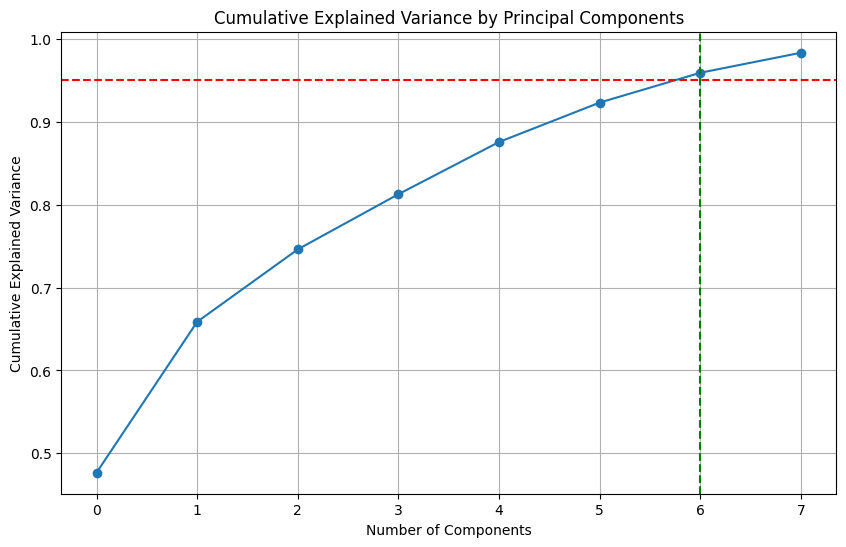

   Adj Close     Close      High       Low      Open    Volume     SMA15  \
0   0.015696  0.021342  0.020762  0.021513  0.022619  0.586846 -1.060847   
1   0.015964  0.021646  0.020541  0.021996  0.022315  0.555024 -1.057827   
2   0.016284  0.021459  0.019947  0.021607  0.021731  0.534332 -1.054508   
3   0.016605  0.021821  0.020564  0.022491  0.021906  0.523042 -1.051483   
4   0.016418  0.021611  0.020576  0.022633  0.022222  0.458038 -1.049063   

       EMA5     RSI15  BB_upper  ...  Donchian_Low       CMF       EoM  \
0 -1.041436  2.144901 -0.933979  ...        25.685  0.319445  0.029670   
1 -1.040197  2.144901 -0.933979  ...        25.685  0.319445  0.032198   
2 -1.039583  2.039056 -0.933979  ...        25.685  0.319445  0.026067   
3 -1.038762  2.084286 -0.933979  ...        25.685  0.319445  0.024731   
4 -1.038454  1.956501 -0.933979  ...        25.685  0.319445  0.018601   

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  
0 -3.020117  2.366458  3

In [14]:

feature_columns = ['Open', 'High', 'Low',
                   'SMA15', 'EMA5', 'RSI15', 'BB_upper', 'BB_lower', 
                   'MACD', 'MACD_signal', 'OBV', 'ADX', 'Aroon_Up', 'Aroon_Down', 'Volume']

X = data[feature_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=8)  # You can specify the number of components you want
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Line for 95% variance threshold
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='g', linestyle='--')  # Components needed for 95%
plt.show()

# Step 4: Transform the original data
# You can choose the number of components based on the cumulative variance plot
n_components_to_keep = np.argmax(cumulative_variance >= 0.95) + 1  # For 95% variance
pca_final = PCA(n_components=n_components_to_keep)
X_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components_to_keep)]
pca_df = pd.DataFrame(data=X_final, columns=pca_columns)

# Optional: Concatenate the PCA results with the original data (if needed)
result_df = pd.concat([data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Show the resulting DataFrame
print(result_df.head())


In [17]:
# Sample DataFrame (replace this with your actual results_df)
# results_df = pd.DataFrame(...)  # Your DataFrame with all the columns

# Step 1: Create Regression Labels
result_df['Target'] = result_df['Close'].shift(-1)  # Predicting the next day's closing price
result_df.dropna(inplace=True)  # Drop rows with NaN values resulting from the shift

# Step 2: Select Principal Components Only
# Assuming your principal components are named 'PC1', 'PC2', etc.
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
X = result_df[pc_columns]

# Step 3: Prepare your labels
y = result_df['Target']

In [16]:
loaded_model = keras.models.load_model('dl_model')

In [18]:
y_pred = loaded_model.predict(X)

3785/3785 [==============================] - 6s 1ms/step


In [20]:
y

0         0.021646
1         0.021459
2         0.021821
3         0.021611
4         0.022628
            ...   
121084    0.979756
121085    0.993081
121086    1.000000
121087    0.997101
121088    0.973258
Name: Target, Length: 121089, dtype: float64

In [22]:
y_pred

(121089, 1)

In [19]:
results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

print(results.tail())

ValueError: Per-column arrays must each be 1-dimensional

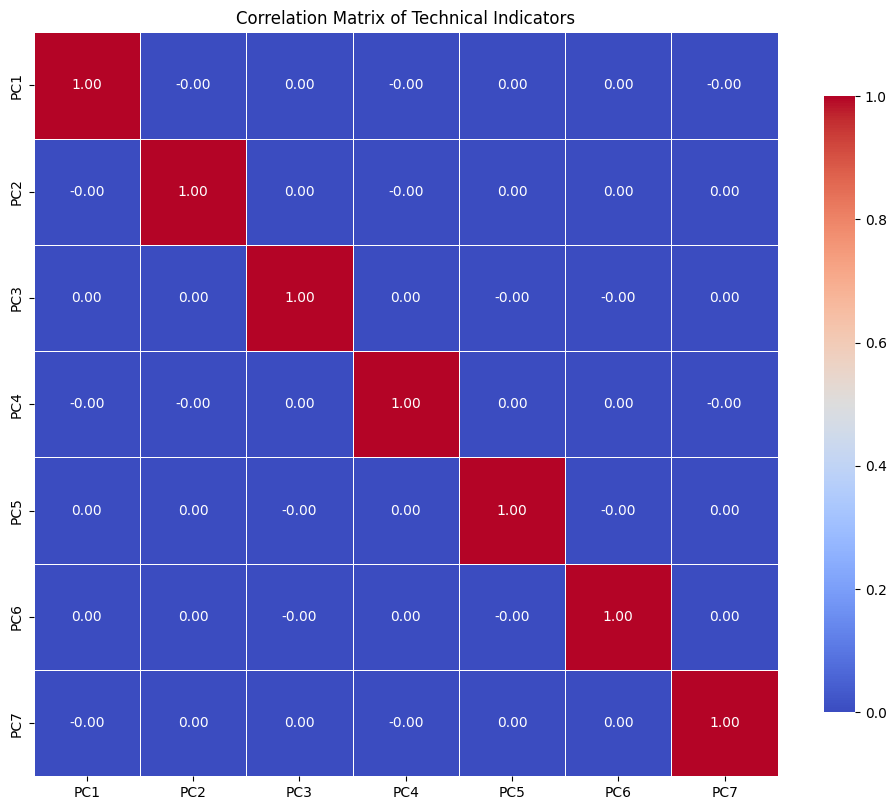

In [40]:


# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Title and show the plot
plt.title('Correlation Matrix of Technical Indicators')
plt.show()


In [43]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Step 1: Create Regression Labels
result_df['Target'] = result_df['Close'].shift(-1)  # Predicting the next day's closing price
result_df.dropna(inplace=True)  # Drop rows with NaN values resulting from the shift

# Step 2: Select Principal Components Only
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
X = result_df[pc_columns]
y = result_df['Target']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build the Neural Network Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer for regression
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 8: Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 10: Create a DataFrame to compare actual vs predicted prices
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # Flatten to convert from 2D to 1D
})

# Print the first few rows of the results
print(results.head())


Num GPUs Available:  1
Epoch 1/100


c:\Users\Nishc\anaconda3\envs\TensorFlow_ENV\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2826/2826 [==============================] - 8s 3ms/step - loss: 0.0025 - val_loss: 8.7543e-04
Epoch 2/100
2826/2826 [==============================] - 8s 3ms/step - loss: 7.6020e-04 - val_loss: 0.0011
Epoch 3/100
2826/2826 [==============================] - 8s 3ms/step - loss: 5.7600e-04 - val_loss: 6.8555e-04
Epoch 4/100
2826/2826 [==============================] - 8s 3ms/step - loss: 5.2423e-04 - val_loss: 9.0737e-04
Epoch 5/100
2826/2826 [==============================] - 8s 3ms/step - loss: 4.9935e-04 - val_loss: 6.6014e-04
Epoch 6/100
2826/2826 [==============================] - 10s 4ms/step - loss: 4.6897e-04 - val_loss: 6.5864e-04
Epoch 7/100
2826/2826 [==============================] - 10s 4ms/step - loss: 4.5004e-04 - val_loss: 6.0284e-04
Epoch 8/100
2826/2826 [==============================] - 10s 4ms/step - loss: 4.2657e-04 - val_loss: 5.8164e-04
Epoch 9/100
2826/2826 [==============================] - 10s 4ms/step - loss: 4.1171e-04 - val_loss: 5.6173e-04
Epoch 10/100
2826

In [45]:
model_dl = model
model_dl.save('dl_model')

INFO:tensorflow:Assets written to: dl_model\assets


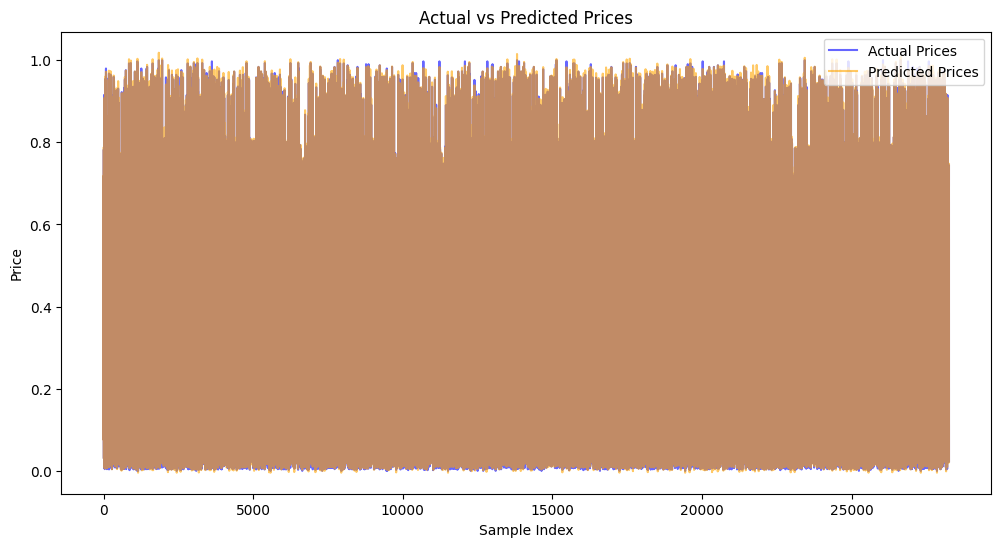

In [32]:

# Plotting actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='orange', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


Linear Regression:
  Mean Squared Error (MSE): 0.0005521771040503732
  Mean Absolute Error (MAE): 0.011183755466732259
  Root Mean Squared Error (RMSE): 0.023498448971163464
  R-squared: 0.9936138632607692



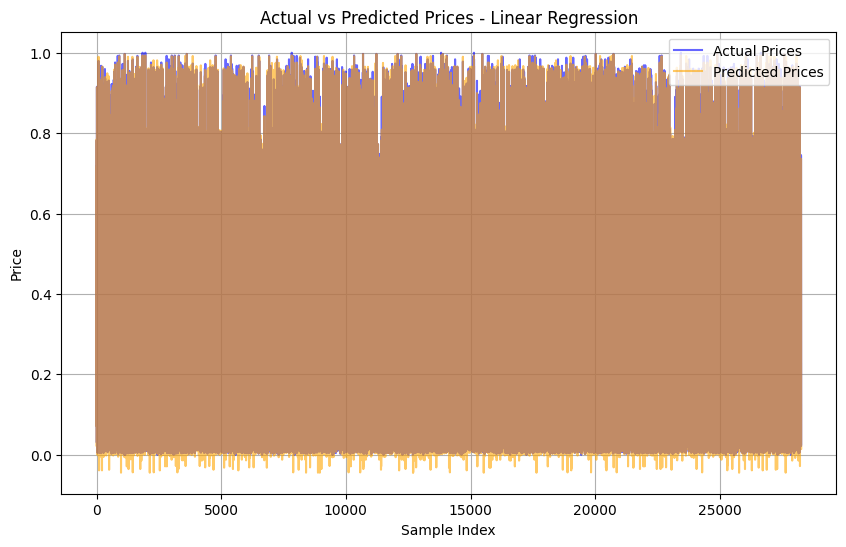

Decision Tree:
  Mean Squared Error (MSE): 2.090416399766373e-06
  Mean Absolute Error (MAE): 5.1219847255641844e-05
  Root Mean Squared Error (RMSE): 0.0014458272371782092
  R-squared: 0.9999758235448863



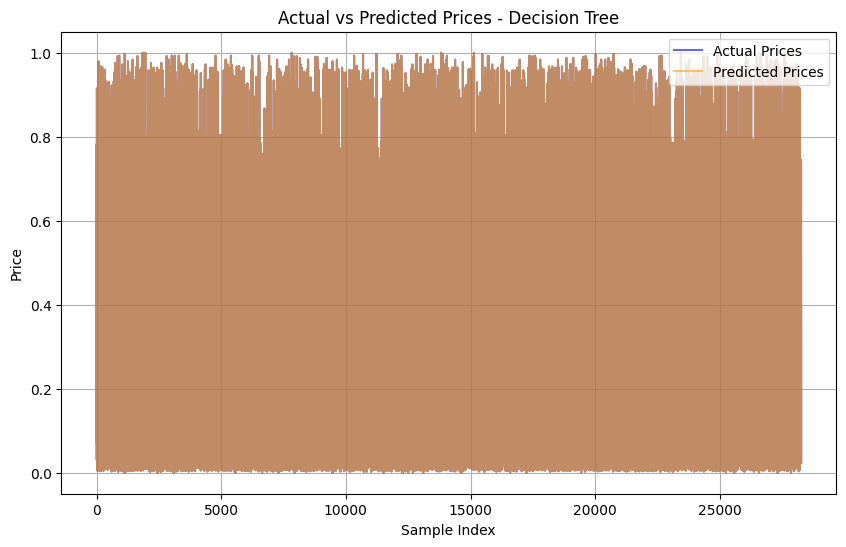

Random Forest:
  Mean Squared Error (MSE): 3.7729359375490554e-06
  Mean Absolute Error (MAE): 7.944971424751456e-05
  Root Mean Squared Error (RMSE): 0.0019424046791410526
  R-squared: 0.9999563645710248



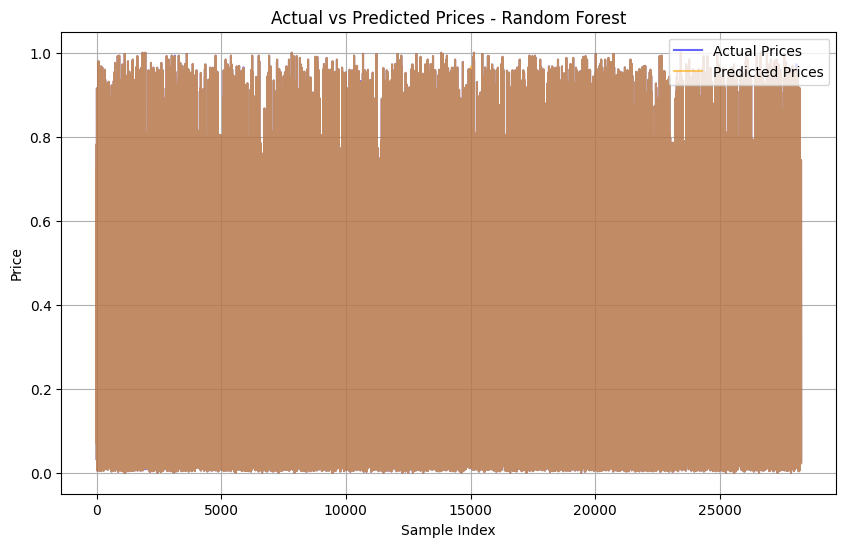

Gradient Boosting:
  Mean Squared Error (MSE): 0.00020924086482088127
  Mean Absolute Error (MAE): 0.00981377209836363
  Root Mean Squared Error (RMSE): 0.014465160380060819
  R-squared: 0.9975800503780773



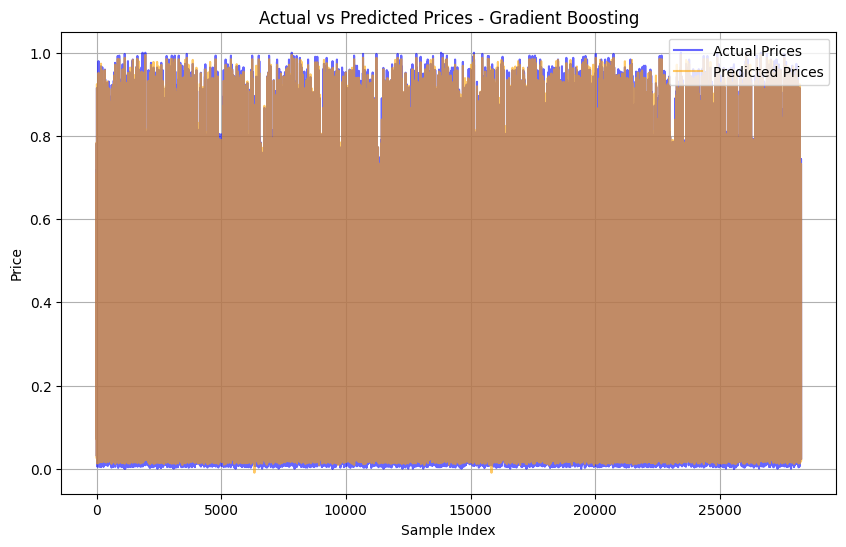

Support Vector Regression:
  Mean Squared Error (MSE): 0.0021723498160389353
  Mean Absolute Error (MAE): 0.037728017300814966
  Root Mean Squared Error (RMSE): 0.0466084736506028
  R-squared: 0.9748759539848615



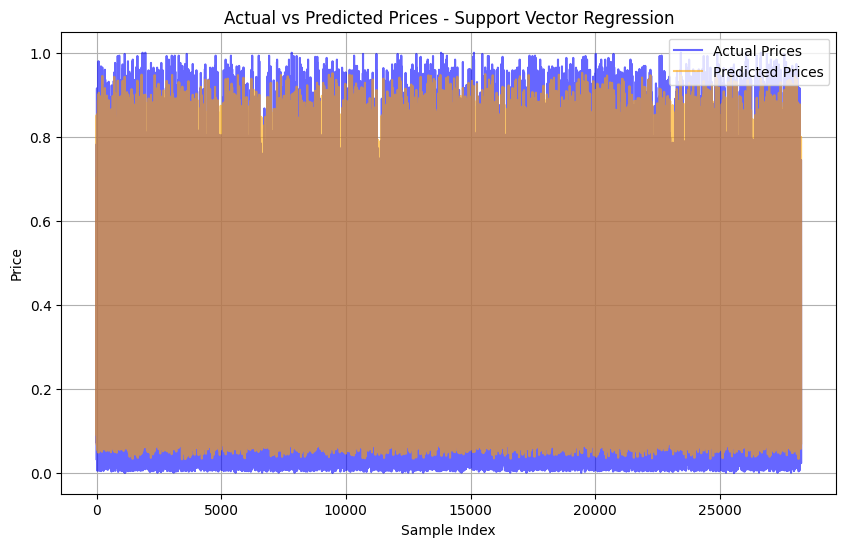

In [33]:
# Create a dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Dictionary to store results
results = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r_squared,
        'Predictions': y_pred
    }

    # Print metrics
    print(f'{model_name}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  Mean Absolute Error (MAE): {mae}')
    print(f'  Root Mean Squared Error (RMSE): {rmse}')
    print(f'  R-squared: {r_squared}')
    print()

    # Plotting Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
    plt.plot(y_pred, label='Predicted Prices', color='orange', alpha=0.6)
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Optionally, if you want to inspect predictions for a specific model:
# print(pd.DataFrame({'Actual': y_test, 'Predicted': results['Random Forest']['Predictions']}))


In [ ]:
X, y

In [22]:
final_X_y = combined_df = pd.concat([X, y], axis=1)  # Use axis=1 to concatenate columns


In [24]:
final_X_y.to_csv('Apple_PreProcessed.csv', index=False)

In [83]:
close = result_df['Close']
print(X.shape)
close.shape

(488, 6)


(488,)

In [86]:
X.drop(columns='Close')

,PC1,PC2,PC3,PC4,PC5,PC6
0,-5.162991,-0.541986,0.220062,2.357983,1.090055,0.380979
1,-5.011012,-0.549788,0.041705,0.720092,1.141468,0.306821
2,-4.892773,-0.498447,0.095553,0.914384,1.002279,0.026247
3,-5.109180,-0.715333,0.030174,0.286908,0.758728,-0.010733
4,-4.668417,-0.011019,0.266225,1.697555,0.806845,-0.693817
...,...,...,...,...,...,...
483,5.152529,-2.638474,-1.411924,-0.713939,0.876088,-0.977746
484,5.274330,-2.607776,-1.534213,-1.258563,0.711122,-1.124922
485,5.281182,-2.233062,-1.712728,-0.845524,0.816643,-0.523317
486,5.387174,-1.909324,-1.667759,-0.162987,0.603943,-0.871710


In [87]:
X_new = pd.concat([X,close], axis=1)

In [ ]:


# Assuming 'data' is your original DataFrame containing the feature columns

# Step 1: Fit PCA
pca = PCA(n_components=6)
pca.fit(data)

# Step 2: Transform the data
X = pca.transform(data)

# Step 3: Retrieve component loadings
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Component Loadings:")
print(loadings)

# Step 4: Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Component:", explained_variance)

# Step 5: Visualize the first two principal components with a biplot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

# Add arrows for feature contributions
for i, feature in enumerate(data.columns):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings.iloc[i, 0], loadings.iloc[i, 1], feature, 
             color='black', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.show()


In [88]:


def create_labels(data, label_type, threshold=None):
    """
    Create labels for different classification types.
    
    Args:
    - data: DataFrame containing the features.
    - label_type: Type of classification ('binary', 'multiclass', 'conditional').
    - threshold: Threshold for binary classification (for 'binary' and 'multi-class').
    
    Returns:
    - labels: Series of labels.
    """
    # Example target column: 'Close'
    target_column = 'Close'
    
    # Ensure the target column exists in the DataFrame
    if target_column not in data.columns:
        raise ValueError(f"{target_column} not found in DataFrame.")
    
    if label_type == 'binary':
        if threshold is None:
            threshold = data[target_column].median()  # Default threshold to median
        labels = (data[target_column] > threshold).astype(int)  # 1 if above threshold, else 0
    
    elif label_type == 'multiclass':
        bins = [0, 100, 150, 200, np.inf]  # Define your bins
        labels = pd.cut(data[target_column], bins=bins, labels=[0, 1, 2, 3], right=False)
    
    elif label_type == 'conditional':
        labels = np.where(data[target_column] > data[target_column].mean(), 1, 0)  # 1 if above average, else 0
    
    else:
        raise ValueError("Invalid label_type. Choose 'binary', 'multiclass', or 'conditional'.")
    
    return labels


In [90]:
labels = create_labels(X, "binary")

0      0
1      0
2      0
3      0
4      0
      ..
483    1
484    1
485    1
486    1
487    1
Name: Close, Length: 488, dtype: int32

In [99]:


def classify_and_evaluate(data, label_type, threshold=None):
    """
    Classify and evaluate the model performance on various algorithms.
    
    Args:
    - data: DataFrame containing the features and target.
    - label_type: Type of classification ('binary', 'multiclass', 'conditional').
    - threshold: Threshold for binary classification.
    
    Returns:
    - None (prints model evaluations).
    """
    # Create labels
    labels = create_labels(data, label_type, threshold)
    
    # Define features (excluding target)
    feature_columns = [col for col in data.columns if col != 'Close']  # Adjust as needed
    X = data[feature_columns]
    y = labels
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    y_train = y_train.iloc[:,0]
    y_test = y_test.iloc[:,0]
    # Initialize classifiers
    classifiers = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=200),
        'Support Vector Classifier': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }
    
    # Evaluate each classifier
    for name, clf in classifiers.items():
        print(X_train.head())
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(report)

classify_and_evaluate(X_new, label_type='binary', threshold=150)  # Adjust threshold as needed


          PC1       PC2       PC3       PC4       PC5       PC6
415  4.525141  1.789435  1.421528 -0.646582  0.796932  0.808185
314  0.814330 -1.617865 -0.539504  0.014556  0.266293 -0.090640
25  -4.701296 -1.100486 -0.380481  0.119212  1.045310 -0.977684
222 -1.030559 -2.669881  0.105975  0.308785 -0.169799  0.080492
298  0.017101 -2.350513  0.340390  0.258032 -0.705902 -0.465540
Random Forest Accuracy: 0.9082
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        17
           1       0.91      0.99      0.95        81

    accuracy                           0.91        98
   macro avg       0.90      0.76      0.81        98
weighted avg       0.91      0.91      0.90        98

          PC1       PC2       PC3       PC4       PC5       PC6
415  4.525141  1.789435  1.421528 -0.646582  0.796932  0.808185
314  0.814330 -1.617865 -0.539504  0.014556  0.266293 -0.090640
25  -4.701296 -1.100486 -0.380481  0.119212  1.045310 -0.977684
22

In [93]:
y.shape


(488,)